<a href="https://colab.research.google.com/github/risaacsia/MPhil_GenomicMedicine/blob/main/GMO7/Anscombe_quartet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anscombe's quartet

Anscombe's quartet comprises of four datasets, and is rather famous. Why? You'll find out in this exercise.

We met the Anscombe quartet in *Research Skills 3: Data Fallacies*. If you have not watched the lecture yet then please do so before going any further.

First you need to read in the data. The data for the Anscombe quartet is hosted on the GMO7 GitHub page, but how do we get data hosted on the internet into R?! The answer is surprisingly simple. All we have to do is put the URL for the raw data in the place of a file location in our data import function. In this example we will use the base r `read.csv()` function but you could use the tidyverse `read_csv()` function to do the same import.

In [3]:
AQ <- read.csv("https://raw.githubusercontent.com/camgenomicmedicine/GMO7-Jupyter/main/data/anscombe-quartet.csv")

In [4]:
head(AQ)

,dataset,x,y
,<chr>,<dbl>,<dbl>
1,I,10,8.04
2,I,8,6.95
3,I,13,7.58
4,I,9,8.81
5,I,11,8.33
6,I,14,9.96


## Part 1

Using either the base r `plot()` function or `ggplot2()` make plots showing the four datasets that make up the Anscombe Quartet. See if you can do this with all four plots in the same plot space or placed side by side.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



dataset,x,y
<chr>,<dbl>,<dbl>
II,10,9.14
II,8,8.14
II,13,8.74
II,9,8.77
II,11,9.26
II,14,8.10
II,6,6.13
II,4,3.10
II,12,9.13


dataset,x,y
<chr>,<dbl>,<dbl>
III,10,7.46
III,8,6.77
III,13,12.74
III,9,7.11
III,11,7.81
III,14,8.84
III,6,6.08
III,4,5.39
III,12,8.15


dataset,x,y
<chr>,<dbl>,<dbl>
IV,8,6.58
IV,8,5.76
IV,8,7.71
IV,8,8.84
IV,8,8.47
IV,8,7.04
IV,8,5.25
IV,19,12.50
IV,8,5.56


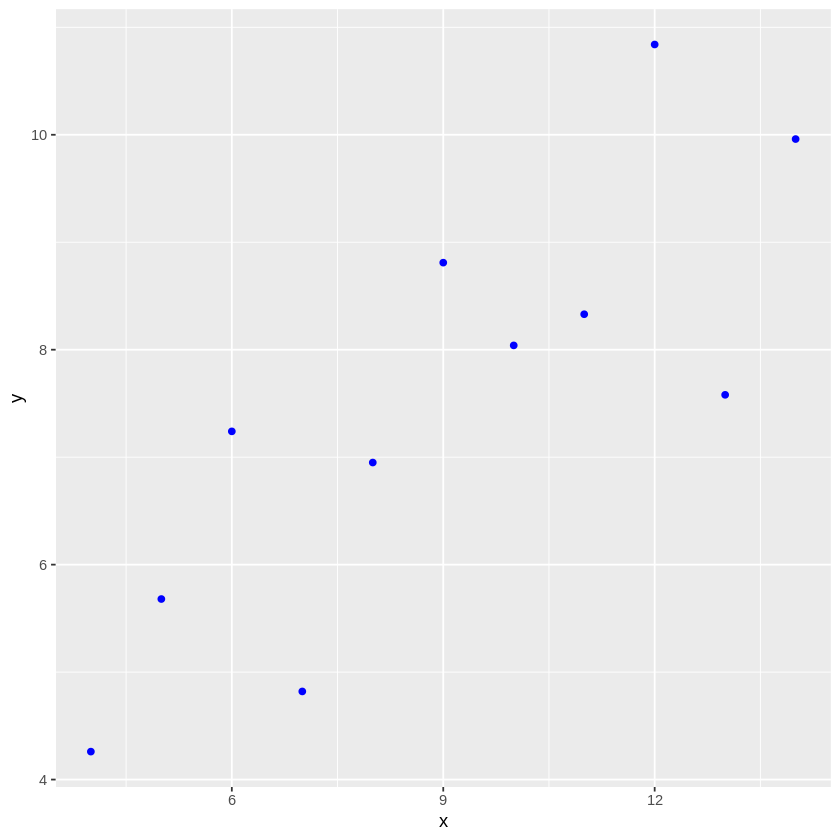

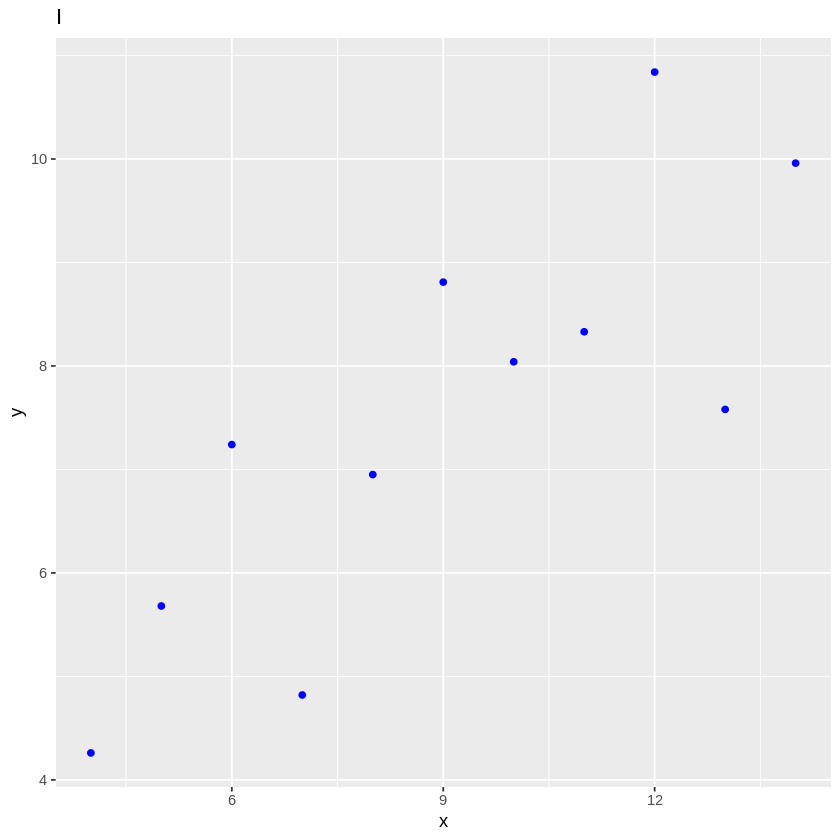

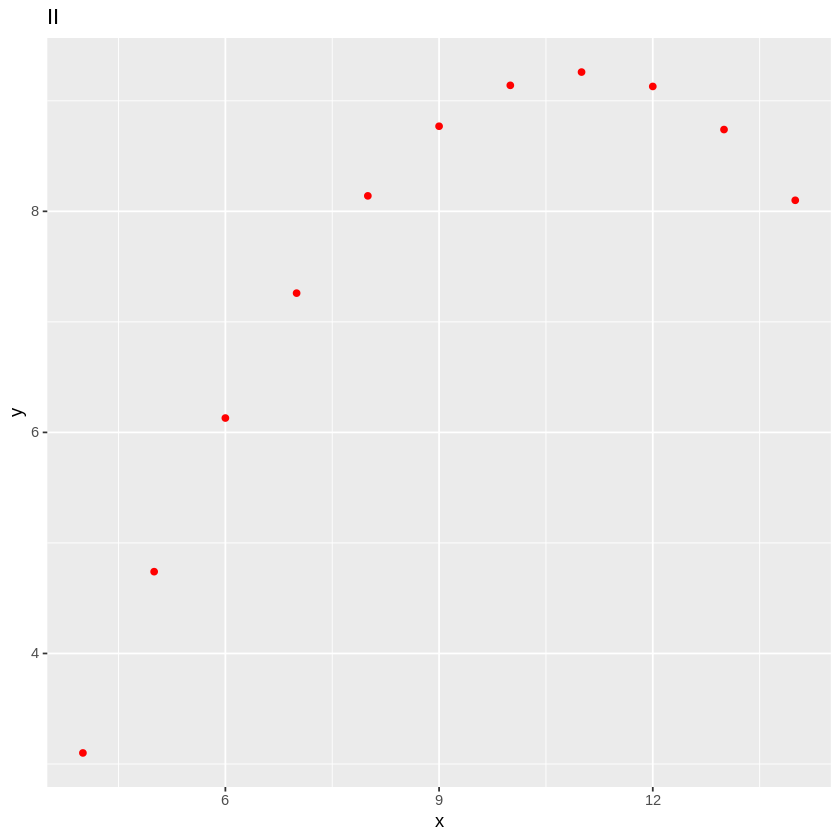

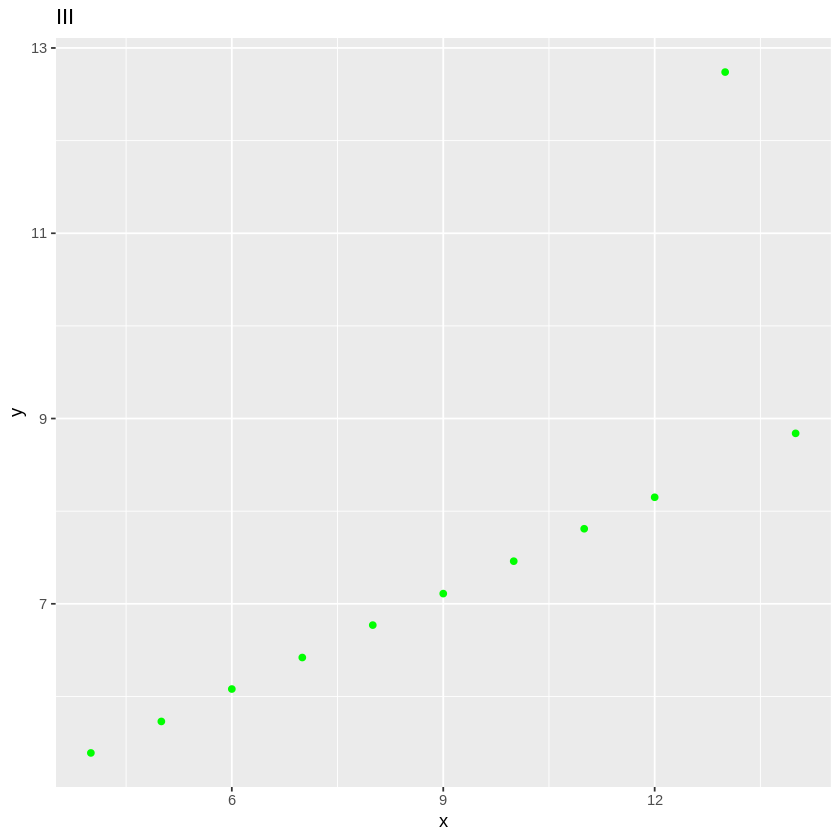

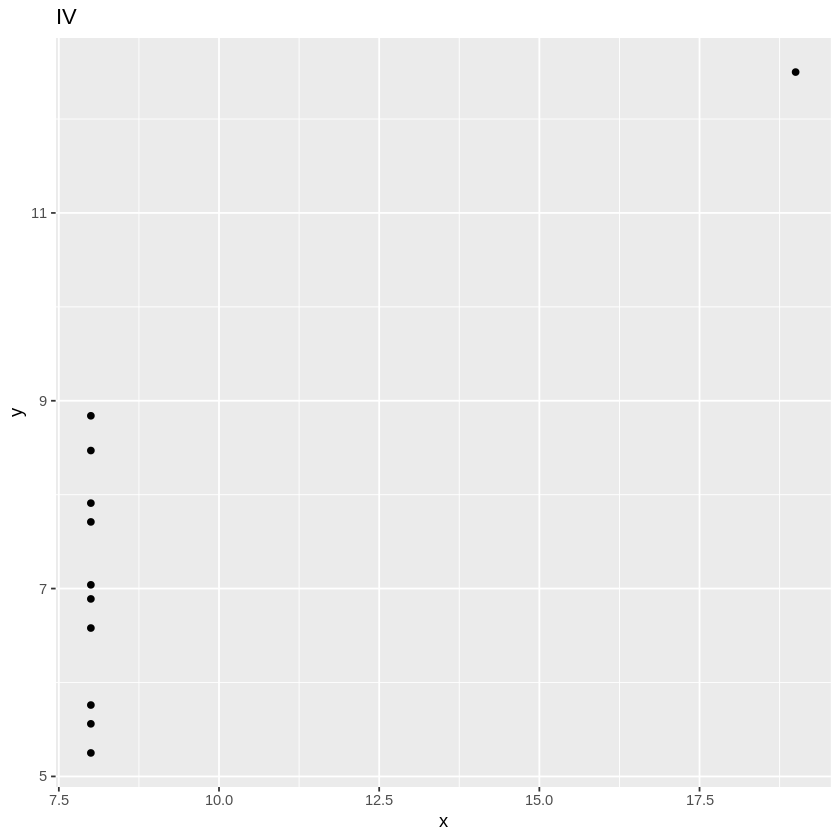

In [8]:
install.packages("tidyverse")
library(tidyverse)

AQ_I <- filter(AQ, dataset == "I")
AQ_I %>%
  ggplot(aes(x = x, y = y)) +
  geom_point(color = "blue")

AQ_II <- filter(AQ, dataset == "II")
AQ_II
AQ_III <- filter(AQ, dataset == "III")
AQ_III
AQ_IV <- filter(AQ, dataset == "IV")
AQ_IV

gAQ_I <- ggplot(AQ_I, aes(x = x, y = y)) + geom_point(color = "blue") + labs(title = "I")
gAQ_II <- ggplot(AQ_II, aes(x = x, y = y)) + geom_point(color = "red") + labs(title = "II")
gAQ_III <- ggplot(AQ_III, aes(x = x, y = y)) + geom_point(color = "green") + labs(title = "III")
gAQ_IV <- ggplot(AQ_IV, aes(x = x, y = y)) + geom_point(color = "black") + labs(title = "IV")

gAQ_I
gAQ_II
gAQ_III
gAQ_IV

## Part 2

For each of the four datasets...
 - Compute the mean and variance of both **x** and **y**
 - Compute the correlation coefficient between **x** and **y**
 - Compute the linear regression line: $y = \beta_0 + \beta_1 x + \epsilon$

In [9]:
mean.var <- AQ %>% group_by(dataset) %>% summarise(mean.x = mean(x), mean.y = mean(y), variance.x = var(x), variance.y = var(y))
mean.var

cor.AQI <- AQ %>% group_by(dataset) %>% summarise(corr = cor(x, y))
cor.AQI

lineI <- lm(AQ_I$y ~ AQ_I$x)
lineI

lineII <- lm(AQ_II$y ~ AQ_II$x)
lineII

lineIII <- lm(AQ_III$y ~ AQ_III$x)
lineIII

lineIV <- lm(AQ_IV$y ~ AQ_IV$x)
lineIV

dataset,mean.x,mean.y,variance.x,variance.y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
I,9,7.500909,11,4.127269
II,9,7.500909,11,4.127629
III,9,7.500000,11,4.122620
IV,9,7.500909,11,4.123249


dataset,corr
<chr>,<dbl>
I,0.8164205
II,0.8162365
III,0.8162867
IV,0.8165214



Call:
lm(formula = AQ_I$y ~ AQ_I$x)

Coefficients:
(Intercept)       AQ_I$x  
     3.0001       0.5001  



Call:
lm(formula = AQ_II$y ~ AQ_II$x)

Coefficients:
(Intercept)      AQ_II$x  
      3.001        0.500  



Call:
lm(formula = AQ_III$y ~ AQ_III$x)

Coefficients:
(Intercept)     AQ_III$x  
     3.0025       0.4997  



Call:
lm(formula = AQ_IV$y ~ AQ_IV$x)

Coefficients:
(Intercept)      AQ_IV$x  
     3.0017       0.4999  
